In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
import pickle

2022-10-28 13:46:28.103037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 13:46:39.995527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/anaconda3/envs/ML-projects/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-28 13:46:39.995601: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-28 13:46:40.713634: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS w

download images

In [5]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [2]:
data_dir='./datasets/flower_photos'

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8747396730_966149e6fe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15922772266_1167a06620.jpg'),
 PosixPath('datasets/flower_photos/roses/160954292_6c2b4fda65_n.jpg')]

In [7]:
flower_images_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [8]:
flower_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8747396730_966149e6fe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15922772266_1167a06620.jpg'),
 PosixPath('datasets/flower_photos/roses/160954292_6c2b4fda65_n.jpg')]

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [10]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[251, 250, 254],
        [255, 253, 255],
        [255, 252, 255],
        ...,
        [253, 255, 252],
        [249, 247, 253],
        [255, 249, 255]],

       [[255, 255, 249],
        [209, 211, 205],
        [ 30,  29,  25],
        ...,
        [ 72, 106,  76],
        [209, 219, 206],
        [255, 254, 254]],

       [[251, 255, 249],
        [178, 180, 174],
        [  0,   3,   0],
        ...,
        [ 14,  70,  29],
        [158, 179, 157],
        [255, 254, 250]],

       ...,

       [[255, 253, 255],
        [190, 186, 185],
        [ 23,  31,  21],
        ...,
        [  9,  16,   9],
        [188, 194, 189],
        [250, 255, 252]],

       [[252, 251, 253],
        [252, 248, 247],
        [210, 212, 206],
        ...,
        [219, 221, 221],
        [247, 247, 247],
        [245, 245, 245]],

       [[253, 255, 255],
        [254, 249, 248],
        [255, 255, 252],
        ...,
        [255, 253, 255],
        [255, 248, 253],
        [255, 253, 255]]

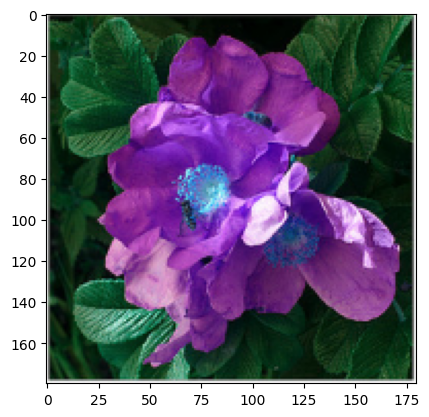

In [11]:
img = cv2.resize(img,(180,180))
plt.imshow(img)

In [12]:
X, y = [], []

for flower_name, images  in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [13]:
y[3665:]

[4, 4, 4, 4, 4]

In [14]:
X[:5]

[array([[[  9,  16,  11],
         [  9,  16,  11],
         [  9,  16,  11],
         ...,
         [ 15,  41,  49],
         [ 15,  39,  50],
         [ 17,  41,  56]],
 
        [[ 10,  17,  12],
         [  8,  15,  10],
         [  7,  14,   9],
         ...,
         [ 13,  41,  51],
         [ 16,  44,  59],
         [ 15,  46,  61]],
 
        [[  7,  14,   9],
         [  7,  14,  11],
         [  8,  15,  10],
         ...,
         [ 15,  45,  54],
         [ 17,  51,  64],
         [ 17,  50,  66]],
 
        ...,
 
        [[225, 208, 219],
         [224, 207, 218],
         [220, 206, 217],
         ...,
         [ 20,  52,  36],
         [ 18,  44,  33],
         [ 14,  35,  25]],
 
        [[215, 198, 211],
         [218, 202, 213],
         [220, 205, 213],
         ...,
         [ 18,  43,  32],
         [ 16,  38,  28],
         [ 11,  31,  18]],
 
        [[200, 192, 200],
         [204, 195, 205],
         [206, 196, 208],
         ...,
         [ 17,  40,  26],
  

In [15]:
# for convinience lets convert X, y into numpy arrays
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [17]:
print(len(X_train),len(X_test))

2752 918


In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
X_test_scaled.shape

(918, 180, 180, 3)

In [20]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

2022-10-28 13:50:35.668022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/anaconda3/envs/ML-projects/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-28 13:50:35.668117: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-28 13:50:35.668183: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (karthikeya): /proc/driver/nvidia/version does not exist
2022-10-28 13:50:35.701524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.fit(X_train_scaled,y_train, epochs=10)

2022-10-28 13:52:32.399936: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1069977600 exceeds 10% of free system memory.


Epoch 1/10


2022-10-28 13:53:25.572956: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 66355200 exceeds 10% of free system memory.
2022-10-28 13:53:29.305776: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 16588800 exceeds 10% of free system memory.
2022-10-28 13:53:29.373599: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33177600 exceeds 10% of free system memory.
2022-10-28 13:53:30.050658: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30326400 exceeds 10% of free system memory.


86/86 [==============================] - 68s 475ms/step - loss: 1.3381 - accuracy: 0.4233
Epoch 2/10
86/86 [==============================] - 44s 514ms/step - loss: 1.0449 - accuracy: 0.5901
Epoch 3/10
86/86 [==============================] - 41s 479ms/step - loss: 0.9144 - accuracy: 0.6439
Epoch 4/10
86/86 [==============================] - 40s 465ms/step - loss: 0.8061 - accuracy: 0.6839
Epoch 5/10
86/86 [==============================] - 42s 483ms/step - loss: 0.6973 - accuracy: 0.7275
Epoch 6/10
86/86 [==============================] - 43s 496ms/step - loss: 0.5514 - accuracy: 0.7932
Epoch 7/10
86/86 [==============================] - 44s 507ms/step - loss: 0.3659 - accuracy: 0.8670
Epoch 8/10
86/86 [==============================] - 42s 493ms/step - loss: 0.2302 - accuracy: 0.9197
Epoch 9/10
86/86 [==============================] - 44s 508ms/step - loss: 0.1685 - accuracy: 0.9451
Epoch 10/10
86/86 [==============================] - 44s 510ms/step - loss: 0.1198 - accuracy: 0.9582


In [22]:
with open("./models/flower_dataset_CNN_model.pickle","wb") as f:
     pickle.dump(model, f)
# pickle_in = open("./models/flower_dataset_CNN_model.pickle","rb")
# model = pickle.load(pickle_in)

INFO:tensorflow:Assets written to: ram://c6ad91b8-52a7-4a21-a9aa-e0cfb4e33abc/assets


INFO:tensorflow:Assets written to: ram://c6ad91b8-52a7-4a21-a9aa-e0cfb4e33abc/assets


In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 72ms/step - loss: 1.7052 - accuracy: 0.5959


[1.7052282094955444, 0.5958605408668518]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

print(classification_report(y_test,y_pred_classes))

29/29 [==============================] - 4s 120ms/step
              precision    recall  f1-score   support

           0       0.44      0.49      0.46       152
           1       0.54      0.51      0.52       173
           2       0.84      0.18      0.29       231
           3       0.55      0.77      0.64       150
           4       0.48      0.74      0.58       212

    accuracy                           0.52       918
   macro avg       0.57      0.54      0.50       918
weighted avg       0.59      0.52      0.49       918

